In [4]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
from IO_functions import *
from parameters import *
from statsFunc import crossValidateKfold
import scipy.io
from paths import *


In [3]:
def AF(date, rcp_scenario, ssp_scenario, tas_percentil, uhi):
    '''
    This function takes apparent temperature (AT) estimates and generates the fraction of deaths attributable to heat (AF)
    '''
    climate_data=xr.open_dataset(path+'/CLIMRISK temperatures/AT/'+rcp_scenario+'/AT_' + rcp_scenario + '_' + ssp_scenario + '_' + tas_percentil + 'th_' + date + '_' + uhi + '.nc')
    AT=climate_data['apparent_tas'] # import AT
    baccini_data = scipy.io.loadmat(path+'/Masks/baccini_matrix.mat')
    h=baccini_data['baccini_matrix']
    b=baccini_data['baccini_variance']
    h_north=21.1 # Temperature threshold Northern
    h_med=25.7 # Temperature threshold Medditeranean
    h_east=19.3 # Temperature threshold Eastern
    #print(baccini_matrix.shape)
    at_boolean=AT>h # is the temperature above
    AF=1/(np.exp(b*(AT-h))*at_boolean)
    climate_data=climate_data.assign(attributable_fraction=AF)
    climate_data.to_netcdf(path+'/CLIMRISK temperatures/AT/'+rcp_scenario+'/AF_' + rcp_scenario +
                           '_' + ssp_scenario + '_' + tas_percentil + 'th_' + date + '_' + uhi + '.nc')
    return AF

In [15]:
    baccini_data = scipy.io.loadmat(path+'/Masks/baccini_matrix.mat')
    h=baccini_data['baccini_matrix']
    b=baccini_data['baccini_variance']
    climate_data=xr.open_dataset(path+'/CLIMRISK temperatures/AT/RCP2.6/AT_RCP2.6_SSP1_50th_20210101-20251231_+UHI.nc')
    AT=climate_data['apparent_tas'] # import AT

In [26]:
at_boolean=np.greater(AT,h) # is the temperature abovep
print(at_boolean.shape)

(1826, 90, 134)


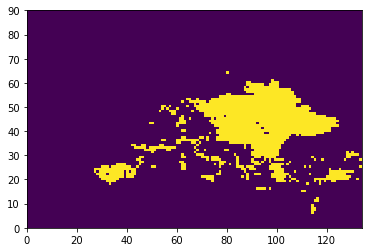

In [29]:
plt.pcolor(at_boolean[200,:,:])

In [32]:
AF=xr.open_dataset(path+'/CLIMRISK temperatures/AT/RCP2.6/AF_RCP2.6_SSP1_50th_20210101-20251231_+UHI.nc')['attributable_fraction']

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

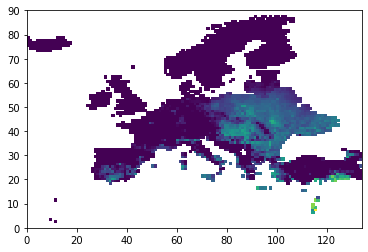

In [42]:
plt.pcolor(AF[200,:,:])
plt.colorbar